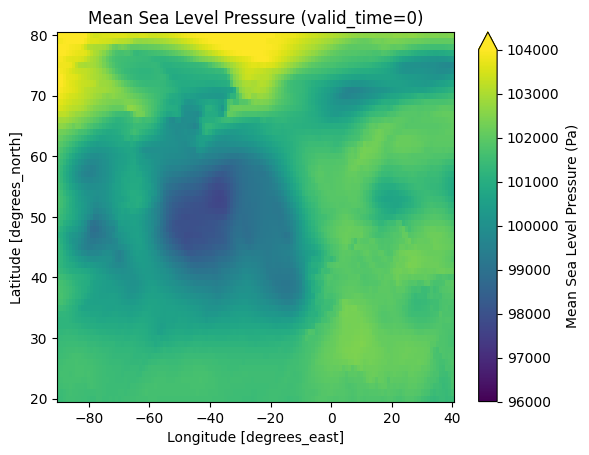

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
ds = xr.open_dataset('C:/Users/31610/Documents/UvA/Master thesis/Data/ERA5/merged_nao_data_1940-2025.nc', decode_times=True)
msl = ds['msl']

# Normalize longitude to -180 to 180 if needed
lon = ds['longitude']
if lon.max() > 180:
    lon = xr.where(lon > 180, lon - 360, lon)
    msl = msl.assign_coords(longitude=lon).sortby('longitude')

# Plot
msl.isel(valid_time=0).plot(vmin=96000, vmax=104000, cmap='viridis', cbar_kwargs={'label': 'Mean Sea Level Pressure (Pa)'})
plt.title('Mean Sea Level Pressure (valid_time=0)')
plt.xlabel('Longitude [degrees_east]')
plt.ylabel('Latitude [degrees_north]')
plt.show()


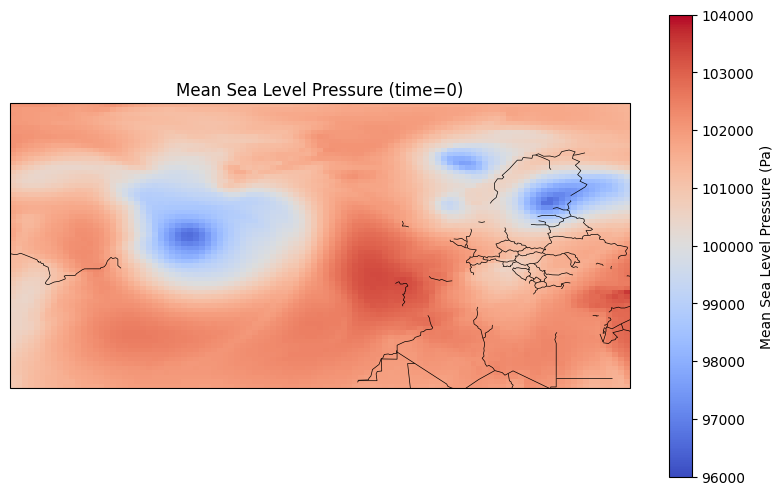

In [ ]:
ds = xr.open_dataset("C:/Users/31610/Documents/UvA/Master thesis/Data/CESM2 Data/merged_cesm2_1301.002.nc", decode_times=True)
msl = ds['PSL']

# Normalize longitude to -180 to 180 if needed
lon = ds['longitude']
if lon.max() > 180:
    lon = xr.where(lon > 180, lon - 360, lon)
    msl = msl.assign_coords(longitude=lon).sortby('longitude')

# Plot
msl.isel(time=0).plot(vmin=96000, vmax=104000, cmap='viridis', cbar_kwargs={'label': 'Mean Sea Level Pressure (Pa)'})
plt.title('Mean Sea Level Pressure (time=0)')
plt.xlabel('Longitude [degrees_east]')
plt.ylabel('Latitude [degrees_north]')
plt.show()

<xarray.DataArray 'time' ()> Size: 8B
array(cftime.DatetimeNoLeap(2014, 2, 6, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)
Coordinates:
    time     object 8B 2014-02-06 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds


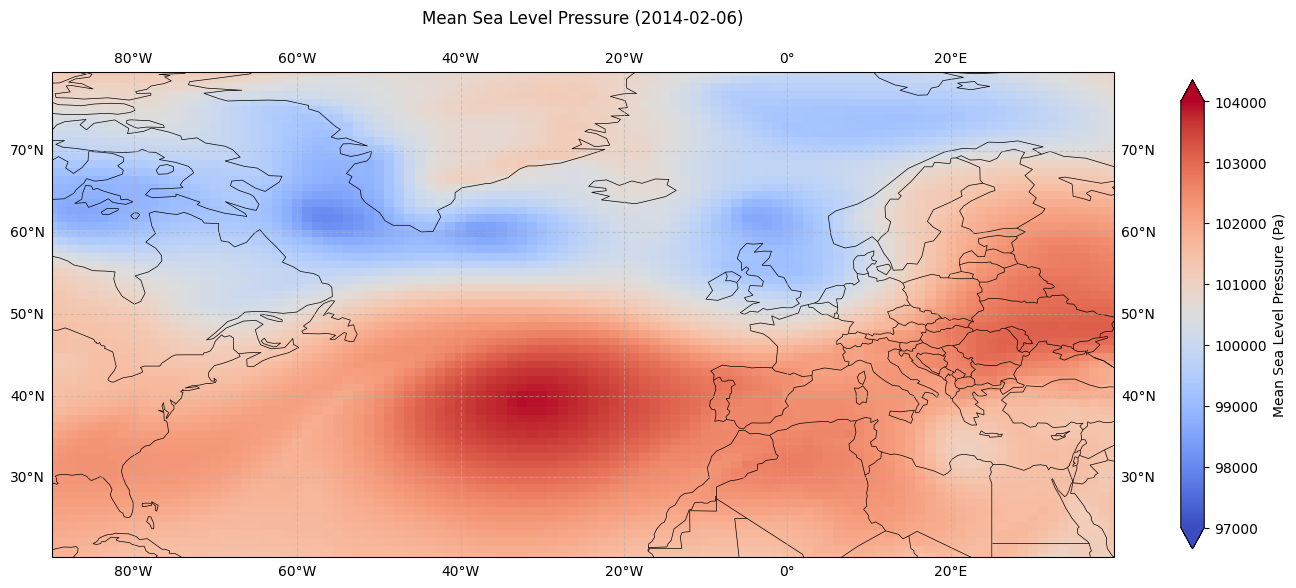

In [3]:
# CESM2 data plotting with cartopy 2014-02-06

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Open de dataset
ds = xr.open_dataset("C:/Users/31610/Documents/UvA/Master thesis/Data/CESM2 Data/merged_cesm2_1301.002.nc", decode_times=True)
msl = ds['PSL']

# Normaliseer lengtegraad naar -180 tot 180 indien nodig
lon = ds['longitude']
if lon.max() > 180:
    lon = xr.where(lon > 180, lon - 360, lon)
    msl = msl.assign_coords(longitude=lon).sortby('longitude')

# Controleer en corrigeer onrealistische waarden
# msl = msl.where((msl >= 97000) & (msl <= 105000), drop=False)  # Beperk tot realistische MSLP-waarden

# Maak een figuur met Cartopy-projectie
plt.figure(figsize=(14, 7))  # Grotere figuur voor betere resolutie
ax = plt.axes(projection=ccrs.PlateCarree())
print(msl['time'][24800])  # Controleer of de tijdindex correct is
msl.isel(time=24866).plot(ax=ax, transform=ccrs.PlateCarree(),
                      vmin=97000, vmax=104000, cmap='coolwarm',
                      cbar_kwargs={'label': 'Mean Sea Level Pressure (Pa)', 'shrink': 0.7, 'extend': 'both'})  # 'extend' voor waarden buiten bereik

# Voeg landgrenzen en kustlijnen toe
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, facecolor='none', edgecolor='none')  # Optioneel voor landmassa-context

# Stel de extent in op de globale kaart (pas aan als data beperkt is)
ax.set_global()  # Gebruik globale projectie
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())  # Zorg voor volledige dekking

# Pas de kaart aan op de beschikbare data
data_extent = [lon.min().values, lon.max().values, ds['latitude'].min().values, ds['latitude'].max().values]
ax.set_extent(data_extent, crs=ccrs.PlateCarree())  # Beperk tot data-uitbreiding

# Aanpassen van de plot
plt.title('Mean Sea Level Pressure (2014-02-06)', pad=20)
ax.set_xlabel('Longitude [°E]')
ax.set_ylabel('Latitude [°N]')
ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)

# Voeg een legenda toe voor ontbrekende gebieden (optioneel)
# ax.outline_patch.set_edgecolor('black')  # Niet nodig of niet ondersteund in recente Cartopy/Matplotlib versies

# Pas layout aan om overlapping te voorkomen
plt.tight_layout()
plt.show()

<xarray.DataArray 'valid_time' ()> Size: 8B
array('2014-02-16T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    number      int64 8B 0
    valid_time  datetime64[ns] 8B 2014-02-16
    expver      <U4 16B ...
Attributes:
    long_name:      time
    standard_name:  time


IndexError: range object index out of range

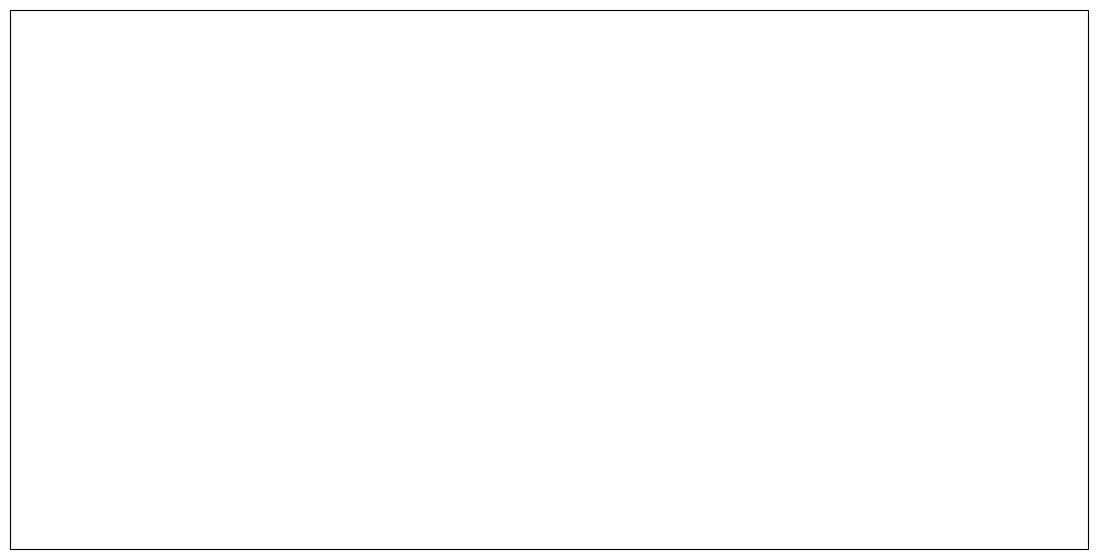

In [1]:
# ERA5 data plotting with cartopy 2014-02-06

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Open de dataset
ds = xr.open_dataset("C:/Users/31610/Documents/UvA/Master thesis/Data/ERA5/merged_nao_data_1940-2025.nc", decode_times=True)
msl = ds['msl']

# Normaliseer lengtegraad naar -180 tot 180 indien nodig
lon = ds['longitude']
if lon.max() > 180:
    lon = xr.where(lon > 180, lon - 360, lon)
    msl = msl.assign_coords(longitude=lon).sortby('longitude')

# Controleer en corrigeer onrealistische waarden
# msl = msl.where((msl >= 97000) & (msl <= 105000), drop=False)  # Beperk tot realistische MSLP-waarden

# Maak een figuur met Cartopy-projectie
plt.figure(figsize=(14, 7))  # Grotere figuur voor betere resolutie
ax = plt.axes(projection=ccrs.PlateCarree())
print(msl['valid_time'][11239])  # Controleer of de tijdindex correct is
msl.isel(valid_time=16629).plot(ax=ax, transform=ccrs.PlateCarree(),
                      vmin=97000, vmax=104000, cmap='coolwarm',
                      cbar_kwargs={'label': 'Mean Sea Level Pressure (Pa)', 'shrink': 0.7, 'extend': 'both'})  # 'extend' voor waarden buiten bereik

# Voeg landgrenzen en kustlijnen toe
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, facecolor='none', edgecolor='none')  # Optioneel voor landmassa-context

# Stel de extent in op de globale kaart (pas aan als data beperkt is)
ax.set_global()  # Gebruik globale projectie
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())  # Zorg voor volledige dekking

# Pas de kaart aan op de beschikbare data
data_extent = [lon.min().values, lon.max().values, ds['latitude'].min().values, ds['latitude'].max().values]
ax.set_extent(data_extent, crs=ccrs.PlateCarree())  # Beperk tot data-uitbreiding

# Aanpassen van de plot
plt.title('Mean Sea Level Pressure (2014-02-06)', pad=20)
ax.set_xlabel('Longitude [°E]')
ax.set_ylabel('Latitude [°N]')
ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)

# Voeg een legenda toe voor ontbrekende gebieden (optioneel)
# ax.outline_patch.set_edgecolor('black')  # Niet nodig of niet ondersteund in recente Cartopy/Matplotlib versies

# Pas layout aan om overlapping te voorkomen
plt.tight_layout()
plt.show()

<xarray.DataArray 'time' ()> Size: 8B
array(cftime.DatetimeNoLeap(2014, 2, 6, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)
Coordinates:
    time     object 8B 2014-02-06 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds


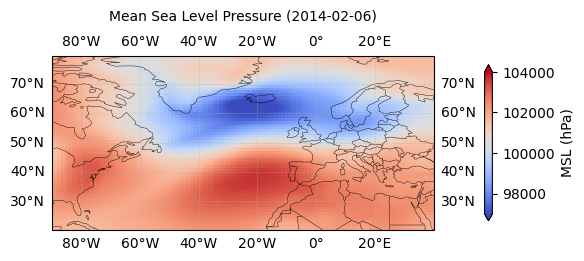

In [39]:
# Smaller figure for thesis
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Open de dataset
ds = xr.open_dataset("C:/Users/31610/Documents/UvA/Master thesis/Data/CESM2 Data/merged_cesm2_1301.002.nc", decode_times=True)
msl = ds['PSL']

# Normaliseer lengtegraad naar -180 tot 180 indien nodig
lon = ds['longitude']
if lon.max() > 180:
    lon = xr.where(lon > 180, lon - 360, lon)
    msl = msl.assign_coords(longitude=lon).sortby('longitude')

# Maak een figuur met Cartopy-projectie (kleinere grootte)
plt.figure(figsize=(6, 3))  # Verkleind naar een compacte grootte (bijv. 6x3 inch)
ax = plt.axes(projection=ccrs.PlateCarree())
print(msl['time'][24800])  # Controleer of de tijdindex correct is
msl.isel(time=24800).plot(ax=ax, transform=ccrs.PlateCarree(),
                          vmin=97000, vmax=104000, cmap='coolwarm',
                          cbar_kwargs={'label': 'MSL (hPa)', 'shrink': 0.6, 'extend': 'both', 'pad': 0.1})  # Verkleinde colorbar

# Voeg landgrenzen en kustlijnen toe
ax.add_feature(cfeature.BORDERS, linewidth=0.3, edgecolor='black')  # Dunner lijntje
ax.add_feature(cfeature.COASTLINE, linewidth=0.3, edgecolor='black')
ax.add_feature(cfeature.LAND, facecolor='none', edgecolor='none')

# Stel de extent in op de globale kaart (pas aan als data beperkt is)
ax.set_global()  # Gebruik globale projectie
data_extent = [lon.min().values, lon.max().values, ds['latitude'].min().values, ds['latitude'].max().values]
ax.set_extent(data_extent, crs=ccrs.PlateCarree())  # Beperk tot data-uitbreiding

# Aanpassen van de plot
plt.title('Mean Sea Level Pressure (2014-02-06)', fontsize=10, pad=10)  # Kleinere titel
ax.set_xlabel('Longitude [°E]', fontsize=8)
ax.set_ylabel('Latitude [°N]', fontsize=8)
ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5, linewidth=0.5)  # Kleinere gridlabels

# Pas layout aan om overlapping te voorkomen
plt.tight_layout()
plt.show()

<xarray.DataArray 'time' ()> Size: 8B
array(cftime.DatetimeNoLeap(2014, 2, 6, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)
Coordinates:
    time     object 8B 2014-02-06 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds


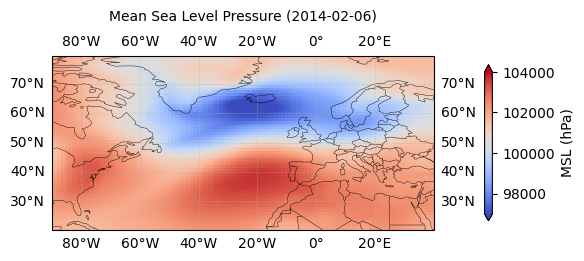

In [42]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Open de dataset
ds = xr.open_dataset("C:/Users/31610/Documents/UvA/Master thesis/Data/CESM2 Data/merged_cesm2_1301.002.nc", decode_times=True)
msl = ds['PSL']

# Normaliseer lengtegraad naar -180 tot 180 indien nodig
lon = ds['longitude']
if lon.max() > 180:
    lon = xr.where(lon > 180, lon - 360, lon)
    msl = msl.assign_coords(longitude=lon).sortby('longitude')

# Maak een figuur met Cartopy-projectie (kleinere grootte)
plt.figure(figsize=(6, 3))  # Verkleind naar een compacte grootte (bijv. 6x3 inch)
ax = plt.axes(projection=ccrs.PlateCarree())
print(msl['time'][24800])  # Controleer of de tijdindex correct is
msl.isel(time=24800).plot(ax=ax, transform=ccrs.PlateCarree(),
                          vmin=97000, vmax=104000, cmap='coolwarm',
                          cbar_kwargs={'label': 'MSL (hPa)', 'shrink': 0.6, 'extend': 'both', 'pad': 0.1})  # Verkleinde colorbar

# Voeg landgrenzen en kustlijnen toe
ax.add_feature(cfeature.BORDERS, linewidth=0.3, edgecolor='black')  # Dunner lijntje
ax.add_feature(cfeature.COASTLINE, linewidth=0.3, edgecolor='black')
ax.add_feature(cfeature.LAND, facecolor='none', edgecolor='none')

# Stel de extent in op de globale kaart (pas aan als data beperkt is)
ax.set_global()  # Gebruik globale projectie
data_extent = [lon.min().values, lon.max().values, ds['latitude'].min().values, ds['latitude'].max().values]
ax.set_extent(data_extent, crs=ccrs.PlateCarree())  # Beperk tot data-uitbreiding

# Aanpassen van de plot
plt.title('Mean Sea Level Pressure (2014-02-06)', fontsize=10, pad=10)  # Kleinere titel
ax.set_xlabel('Longitude [°E]', fontsize=8)
ax.set_ylabel('Latitude [°N]', fontsize=8)
ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5, linewidth=0.5)  # Kleinere gridlabels

# Pas layout aan om overlapping te voorkomen
plt.tight_layout()

# Sla de plot op als een high-resolution PNG
plt.savefig('C:/Users/31610/Documents/UvA/Master thesis/Figures/msl_pressure_2014-02-06.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

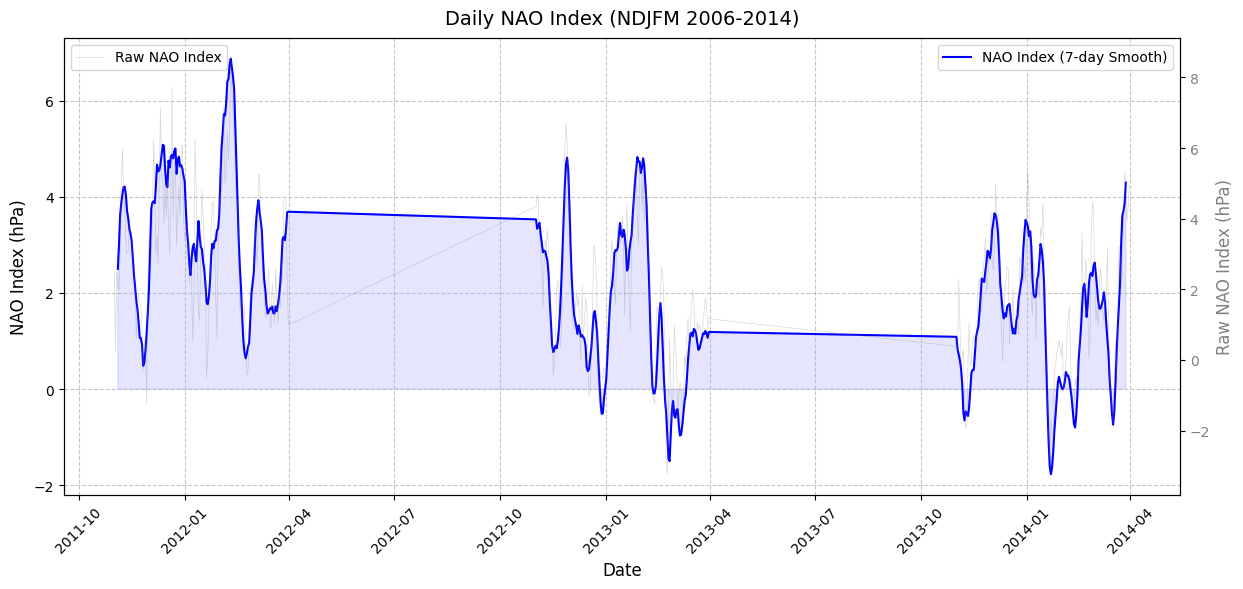

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cftime

# Path to the dataset
base_path = "C:/Users/31610/Documents/UvA/Master thesis/Data/CESM2 Data/test set PSL"
dataset_file = "merged_cesm2_PSL_testset.nc"  # Update if needed
file_path = os.path.join(base_path, dataset_file)

# Load the dataset
nao_data = xr.open_dataset(file_path)
nao_data = nao_data.rename({'PSL': 'msl', 'time': 'valid_time'})

# Robust time conversion
time_coord = 'valid_time'
if isinstance(nao_data[time_coord].values[0], (cftime.datetime, cftime.DatetimeNoLeap)):
    dates = pd.to_datetime([d.strftime('%Y-%m-%d') for d in nao_data[time_coord].values], errors='coerce')
else:
    dates = pd.to_datetime(nao_data[time_coord].values, errors='coerce')
if dates.isna().all():
    raise ValueError("All time values are NaT. Check dataset time encoding or file path.")
nao_data[time_coord] = dates

# Select data for winter months (NDJFM) from 2011 to 2014
start_date = pd.to_datetime('2011-11-01')
end_date = pd.to_datetime('2014-03-31')
nao_data = nao_data.sel(valid_time=slice(start_date, end_date))

# Define NAO regions (standardized Iceland and Azores boxes)
iceland = nao_data.sel(latitude=slice(65, 70), longitude=slice(340, 350))  # Iceland: 65-70N, 20-10W (340-350E)
azores = nao_data.sel(latitude=slice(35, 40), longitude=slice(325, 335))   # Azores: 35-40N, 25-35W (325-335E)

# Compute spatial means
iceland_mean = iceland['msl'].mean(dim=['latitude', 'longitude'])
azores_mean = azores['msl'].mean(dim=['latitude', 'longitude'])

# Compute NAO index (difference in hPa)
nao_index = (azores_mean - iceland_mean) / 1000  # Convert from Pa to hPa
nao_index = nao_index.rename('nao_index')

# Handle NaN values with interpolation
nao_index = nao_index.interpolate_na(dim='valid_time', method='linear', fill_value='extrapolate')
nan_count = np.isnan(nao_index.values).sum()
if nan_count > 0:
    print(f"Warning: {nan_count} NaN values remain after interpolation. Filling with 0.")
    nao_index = nao_index.fillna(0)

# Smooth the data with a rolling mean (optional, 7-day window)
nao_index_smooth = nao_index.rolling(valid_time=7, center=True).mean()

# Plot the NAO index
plt.figure(figsize=(12, 6))
plt.plot(nao_index.valid_time, nao_index_smooth, color='blue', label='NAO Index (7-day Smooth)', linewidth=1.5)
plt.fill_between(nao_index.valid_time, nao_index_smooth, where=(nao_index_smooth >= 0), interpolate=True, color='blue', alpha=0.1)
plt.fill_between(nao_index.valid_time, nao_index_smooth, where=(nao_index_smooth < 0), interpolate=True, color='blue', alpha=0.1)

# Customize plot
plt.title('Daily NAO Index (NDJFM 2006-2014)', fontsize=14, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('NAO Index (hPa)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=10)
plt.xticks(rotation=45)
plt.gca().tick_params(axis='x', labelsize=10)
plt.gca().tick_params(axis='y', labelsize=10)
plt.tight_layout()

# Add secondary y-axis for raw data (optional)
ax2 = plt.gca().twinx()
ax2.plot(nao_index.valid_time, nao_index, color='gray', alpha=0.3, label='Raw NAO Index', linewidth=0.5)
ax2.set_ylabel('Raw NAO Index (hPa)', fontsize=12, color='gray')
ax2.tick_params(axis='y', labelcolor='gray')
plt.legend(loc='upper left', fontsize=10)

plt.show()

[91, 815, 816, 834, 835, 1375, 1376, 1705, 1706, 1897, 2138, 2579, 3044, 3504, 3505, 3506, 3507, 3508, 3540, 3541, 3542, 3543, 4011, 4012, 4013, 4014, 4015, 5125, 5126, 5188, 5189, 5190, 5191, 5479, 5604, 5605, 5606, 5743, 6340, 6341, 6342, 6705, 6850, 6851, 6869, 6870, 7982, 7983, 7984, 8140, 8166, 8167, 8264, 8373, 8374, 9374, 9375, 9522, 9742, 9808, 9809, 9810, 9811, 10169, 10170, 11092, 11857, 11858, 11859, 11860, 12786, 12787, 12936, 12937, 12938, 12939, 12940, 12941, 12942, 12943, 12944, 12945, 12946, 13582, 13583, 13584, 13719, 13722, 13723, 14358, 14359, 14360, 15554, 15555, 16076, 16077, 16084, 16344, 16345, 16346, 16347, 16348, 16383, 16384, 16385, 16386, 16387, 16851, 16852, 17253, 17286, 17287, 17288, 17289, 17290, 17291, 17292, 17293, 17294, 17416, 17639, 17640, 17641, 18039, 18172, 18823, 18824, 18825, 19093, 19094, 19095, 19096, 19117, 19346, 19872, 20637, 20638, 20876, 20884, 21016, 21017, 21018, 21019, 21020, 21062, 21316, 21953, 21954, 21955, 22160, 22161, 22384, 2238

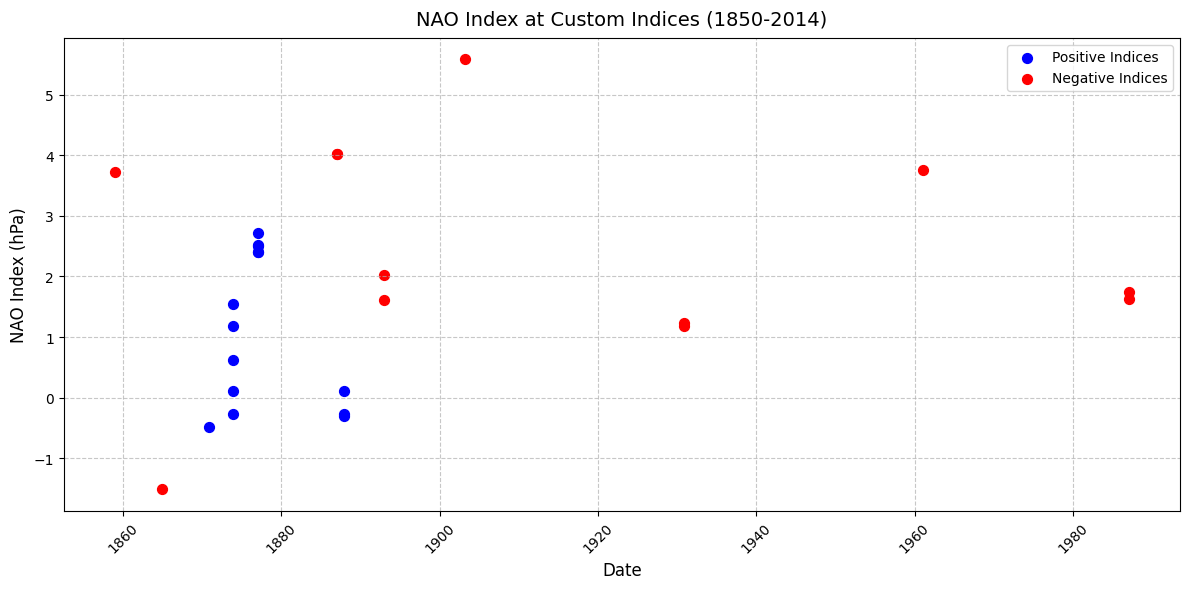

In [13]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cftime

# Path to the dataset
base_path = "C:/Users/31610/Documents/UvA/Master thesis/Data/CESM2 Data/test set PSL"
dataset_file = "merged_cesm2_PSL_testset.nc"  # Update if needed
file_path = os.path.join(base_path, dataset_file)

# Load the dataset
nao_data = xr.open_dataset(file_path)
nao_data = nao_data.rename({'PSL': 'msl', 'time': 'valid_time'})

# Robust time conversion
time_coord = 'valid_time'
if isinstance(nao_data[time_coord].values[0], (cftime.datetime, cftime.DatetimeNoLeap)):
    dates = pd.to_datetime([d.strftime('%Y-%m-%d') for d in nao_data[time_coord].values], errors='coerce')
else:
    dates = pd.to_datetime(nao_data[time_coord].values, errors='coerce')
if dates.isna().all():
    raise ValueError("All time values are NaT. Check dataset time encoding or file path.")
nao_data[time_coord] = dates

# Select data for the full range (1850-2014)
start_date = pd.to_datetime('1850-11-01')
end_date = pd.to_datetime('2014-03-31')
nao_data = nao_data.sel(valid_time=slice(start_date, end_date))

# Define NAO regions (standardized Iceland and Azores boxes)
iceland = nao_data.sel(latitude=slice(65, 70), longitude=slice(340, 350))  # Iceland: 65-70N, 20-10W (340-350E)
azores = nao_data.sel(latitude=slice(35, 40), longitude=slice(325, 335))   # Azores: 35-40N, 25-35W (325-335E)

# Compute spatial means
iceland_mean = iceland['msl'].mean(dim=['latitude', 'longitude'])
azores_mean = azores['msl'].mean(dim=['latitude', 'longitude'])

# Compute NAO index (difference in hPa)
nao_index = (azores_mean - iceland_mean) / 1000  # Convert from Pa to hPa
nao_index = nao_index.rename('nao_index')

# Handle NaN values with interpolation
nao_index = nao_index.interpolate_na(dim='valid_time', method='linear', fill_value='extrapolate')
nan_count = np.isnan(nao_index.values).sum()
if nan_count > 0:
    print(f"Warning: {nan_count} NaN values remain after interpolation. Filling with 0.")
    nao_index = nao_index.fillna(0)

# Smooth the data with a rolling mean (optional, 7-day window)
nao_index_smooth = nao_index.rolling(valid_time=7, center=True).mean()

# Define the lists of indices
#pos_indices = [2579, 18825, 19096, 13719, 18823, 3044, 11860, 4015, 20884, 11092, 21016, 21316, 5125, 17639, 16387, 3505, 9808, 22651, 17253, 22384, 6705, 8140, 22653, 20876, 18824, 19346, 9811, 16077, 13723, 16076, 19872, 22385, 18039, 16348, 3508, 4011, 3504, 1376, 16851, 14360, 16084, 2138, 3540, 5604, 13582, 12786, 8373, 14359, 13722, 15554, 91, 5126, 4014, 12936, 10170, 10169, 17294, 22160, 24680, 15555, 3506, 9522, 8264, 8167, 13584, 1897, 5606, 5479, 23190, 9810, 6340, 1375, 6342, 9809, 5191, 816, 6850, 815, 21062, 17292, 7982, 21955, 8374, 21018, 18172, 16344, 13583, 9374, 7984, 6869, 9375, 6870, 8166, 5188, 1706, 17291, 12787, 21017, 6851, 4013, 16852, 17293, 17416, 5605, 21953, 12939, 23191, 14358, 21020, 20637, 19095, 19117, 17641, 3507, 16383, 11857, 9742, 23193, 5743, 22652, 21954, 17640, 4012, 17286, 22161, 19093, 7983, 21019, 3541, 16347, 11859, 23192, 1705, 12938, 12946, 6341, 11858, 12937, 16346, 17290, 12940, 16345, 19094, 834, 12945, 20638, 3543, 16386, 12941, 835, 12943, 5190, 16385, 12942, 12944, 3542, 16384, 17289, 5189, 17287, 17288]

neg_indices = [1234, 7985, 12086, 16674, 20641, 6396, 5482, 5480, 12085, 2137, 6394, 20639]

pos_indices = sorted(set(pos_indices))  # Remove duplicates and sort
print(pos_indices)

pos_indices = [3044, 3504, 3505, 3506, 3507, 3508, 4011, 4012, 4013, 4014, 4015, 5604, 5605, 5606]
# Get total number of indices in the dataset
total_indices = len(nao_data.valid_time)

# Validate and map indices to timestamps and values for positive indices
valid_pos_indices = [i for i in pos_indices if 0 <= i < total_indices]
pos_time_values = nao_data.valid_time.values[valid_pos_indices]
pos_nao_values = nao_index_smooth.isel(valid_time=valid_pos_indices)
invalid_pos_indices = [i for i in pos_indices if i not in valid_pos_indices]
if invalid_pos_indices:
    print(f"Warning: The following positive indices are out of range (0 to {total_indices - 1}) and will be ignored: {invalid_pos_indices}")

# Validate and map indices to timestamps and values for negative indices
valid_neg_indices = [i for i in neg_indices if 0 <= i < total_indices]
neg_time_values = nao_data.valid_time.values[valid_neg_indices]
neg_nao_values = nao_index_smooth.isel(valid_time=valid_neg_indices)
invalid_neg_indices = [i for i in neg_indices if i not in valid_neg_indices]
if invalid_neg_indices:
    print(f"Warning: The following negative indices are out of range (0 to {total_indices - 1}) and will be ignored: {invalid_neg_indices}")

# Plot the NAO index as datapoints
plt.figure(figsize=(12, 6))
plt.scatter(pos_time_values, pos_nao_values, color='blue', label='Positive Indices', s=50)
plt.scatter(neg_time_values, neg_nao_values, color='red', label='Negative Indices', s=50)

# Customize plot
plt.title('NAO Index at Custom Indices (1850-2014)', fontsize=14, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('NAO Index (hPa)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=10)
plt.xticks(rotation=45)
plt.gca().tick_params(axis='x', labelsize=10)
plt.gca().tick_params(axis='y', labelsize=10)
plt.tight_layout()

plt.show()

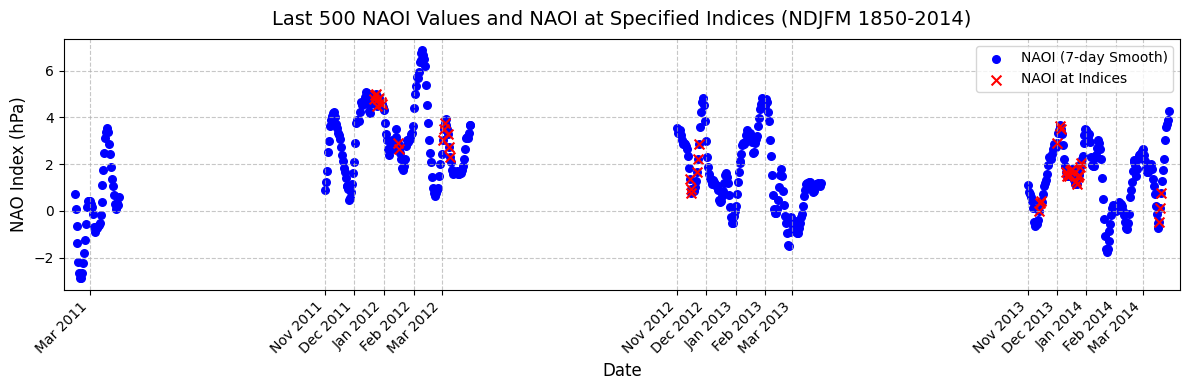

In [28]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cftime

# Provided list of indices (after subtracting 14)
indices = [
    24752, 24433, 24643, 24806, 24750, 24440, 24647, 24370, 24770, 24648,
    24432, 24793, 24434, 24795, 24484, 24485, 24659, 24483, 24653, 24771,
    24387, 24365, 24477, 24668, 24366, 24362, 24388, 24751, 24439, 24656,
    24364, 24475, 24438, 24363, 24369, 24625, 24663, 24627, 24655, 24654,
    24367, 24626, 24476, 24664, 24657, 24368, 24667, 24658, 24665, 24666, 25000
]

# Path to the dataset
base_path = "C:/Users/31610/Documents/UvA/Master thesis/Data/CESM2 Data/test set PSL"
dataset_file = "merged_cesm2_PSL_testset.nc"  # Update if needed
file_path = os.path.join(base_path, dataset_file)

# Load the dataset
nao_data = xr.open_dataset(file_path)
nao_data = nao_data.rename({'PSL': 'msl', 'time': 'valid_time'})

# Robust time conversion
time_coord = 'valid_time'
if isinstance(nao_data[time_coord].values[0], (cftime.datetime, cftime.DatetimeNoLeap)):
    dates = pd.to_datetime([d.strftime('%Y-%m-%d') for d in nao_data[time_coord].values], errors='coerce')
else:
    dates = pd.to_datetime(nao_data[time_coord].values, errors='coerce')
if dates.isna().all():
    raise ValueError("All time values are NaT. Check dataset time encoding or file path.")
nao_data[time_coord] = dates

# Select data for the full range (1850-2014) and filter to NDJFM months
start_date = pd.to_datetime('1850-11-01')
end_date = pd.to_datetime('2014-03-31')
nao_data = nao_data.sel(valid_time=slice(start_date, end_date))
# Filter to November (11), December (12), January (1), February (2), March (3)
nao_data = nao_data.where(nao_data['valid_time'].dt.month.isin([11, 12, 1, 2, 3]), drop=True)

# Define NAO regions (standardized Iceland and Azores boxes)
iceland = nao_data.sel(latitude=slice(65, 70), longitude=slice(340, 350))  # Iceland: 65-70N, 20-10W (340-350E)
azores = nao_data.sel(latitude=slice(35, 40), longitude=slice(325, 335))   # Azores: 35-40N, 25-35W (325-335E)

# Compute spatial means
iceland_mean = iceland['msl'].mean(dim=['latitude', 'longitude'])
azores_mean = azores['msl'].mean(dim=['latitude', 'longitude'])

# Compute NAO index (difference in hPa)
nao_index = (azores_mean - iceland_mean) / 1000  # Convert from Pa to hPa
nao_index = nao_index.rename('nao_index')

# Handle NaN values with interpolation
nao_index = nao_index.interpolate_na(dim='valid_time', method='linear', fill_value='extrapolate')
nan_count = np.isnan(nao_index.values).sum()
if nan_count > 0:
    print(f"Warning: {nan_count} NaN values remain after interpolation. Filling with 0.")
    nao_index = nao_index.fillna(0)

# Smooth the data with a rolling mean (7-day window)
nao_index_smooth = nao_index.rolling(valid_time=7, center=True).mean()

# Extract the last 500 NDJFM values
total_indices = len(nao_data.valid_time)
if total_indices < 500:
    raise ValueError(f"Dataset has only {total_indices} NDJFM values, cannot extract 500.")
last_500_indices = slice(-500, None)
last_500_times = nao_data.valid_time.values[last_500_indices]
last_500_values = nao_index_smooth.isel(valid_time=last_500_indices)

# Extract NAO index values at the provided indices
# Ensure indices are within bounds
valid_indices = [i for i in indices if i < len(nao_data.valid_time)]
if len(valid_indices) < len(indices):
    print(f"Warning: {len(indices) - len(valid_indices)} indices were out of bounds and excluded.")
index_times = nao_data.valid_time.values[valid_indices]
index_values = nao_index_smooth.isel(valid_time=valid_indices)

# Create a DataFrame for the last 500 values
df = pd.DataFrame({'time': last_500_times, 'naoi': last_500_values.values})

# Create a DataFrame for the indexed values
df_indices = pd.DataFrame({'time': index_times, 'naoi_indices': index_values.values})

# Plot the last 500 NAOI values and the indexed values
plt.figure(figsize=(12, 4))  # Adjusted height to match screenshot style
plt.scatter(df['time'], df['naoi'], color='blue', label='NAOI (7-day Smooth)', s=30)
plt.scatter(df_indices['time'], df_indices['naoi_indices'], color='red', label='NAOI at Indices', s=50, marker='x')

# Customize plot
plt.title('Last 500 NAOI Values and NAOI at Specified Indices (NDJFM 1850-2014)', fontsize=14, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('NAO Index (hPa)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=10)

# Set x-axis ticks to NDJFM month starts with custom labels
ndjfm_ticks = pd.date_range(start=df['time'].min(), end=df['time'].max(), freq='MS')
ndjfm_ticks = ndjfm_ticks[ndjfm_ticks.month.isin([11, 12, 1, 2, 3])]
tick_labels = [t.strftime('%b %Y') for t in ndjfm_ticks]  # Format as "Nov 2012", "Dec 2012", etc.
plt.xticks(ndjfm_ticks, tick_labels, rotation=45, ha='right')

# Adjust layout to minimize whitespace
plt.margins(x=0.01)  # Reduce margins to minimize whitespace
plt.tight_layout()

plt.show()

In [24]:
import xarray as xr
import pandas as pd
import numpy as np
import os
import cftime

# Path to the dataset
base_path = "C:/Users/31610/Documents/UvA/Master thesis/Data/CESM2 Data/test set PSL"
dataset_file = "merged_cesm2_PSL_testset.nc"  # Update if needed
file_path = os.path.join(base_path, dataset_file)

# Load the dataset
nao_data = xr.open_dataset(file_path)
nao_data = nao_data.rename({'PSL': 'msl', 'time': 'valid_time'})

# Robust time conversion
time_coord = 'valid_time'
if isinstance(nao_data[time_coord].values[0], (cftime.datetime, cftime.DatetimeNoLeap)):
    dates = pd.to_datetime([d.strftime('%Y-%m-%d') for d in nao_data[time_coord].values], errors='coerce')
else:
    dates = pd.to_datetime(nao_data[time_coord].values, errors='coerce')
if dates.isna().all():
    raise ValueError("All time values are NaT. Check dataset time encoding or file path.")
nao_data[time_coord] = dates

# Select data for the full range (1850-2014)
start_date = pd.to_datetime('1850-11-01')
end_date = pd.to_datetime('2014-03-31')
nao_data = nao_data.sel(valid_time=slice(start_date, end_date))

# Define NAO regions (standardized Iceland and Azores boxes)
iceland = nao_data.sel(latitude=slice(65, 70), longitude=slice(340, 350))  # Iceland: 65-70N, 20-10W (340-350E)
azores = nao_data.sel(latitude=slice(35, 40), longitude=slice(325, 335))   # Azores: 35-40N, 25-35W (325-335E)

# Compute spatial means
iceland_mean = iceland['msl'].mean(dim=['latitude', 'longitude'])
azores_mean = azores['msl'].mean(dim=['latitude', 'longitude'])

# Compute NAO index (difference in hPa)
nao_index = (azores_mean - iceland_mean) / 1000  # Convert from Pa to hPa
nao_index = nao_index.rename('nao_index')

# Handle NaN values with interpolation
nao_index = nao_index.interpolate_na(dim='valid_time', method='linear', fill_value='extrapolate')
nan_count = np.isnan(nao_index.values).sum()
if nan_count > 0:
    print(f"Warning: {nan_count} NaN values remain after interpolation. Filling with 0.")
    nao_index = nao_index.fillna(0)

# Calculate the average NAO index over the complete dataset
average_nao = nao_index.mean(dim='valid_time').values

# Print the result
print(f"The average NAO index over the complete dataset (1850-11-01 to 2014-03-31) is: {average_nao:.4f} hPa")

# Optional: Save the result to a file if needed
with open('average_nao.txt', 'w') as f:
    f.write(f"Average NAO Index: {average_nao:.4f} hPa\n")

The average NAO index over the complete dataset (1850-11-01 to 2014-03-31) is: 2.2041 hPa


<xarray.DataArray 'time' ()> Size: 8B
array(cftime.DatetimeNoLeap(2014, 2, 6, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)
Coordinates:
    time     object 8B 2014-02-06 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds


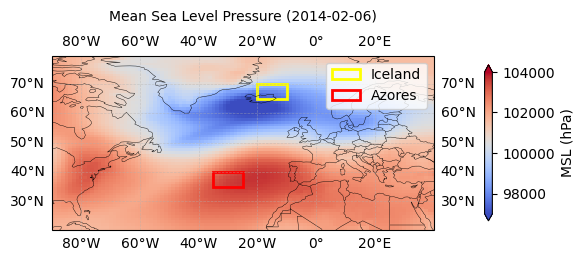

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle

# Open de dataset
ds = xr.open_dataset("C:/Users/31610/Documents/UvA/Master thesis/Data/CESM2 Data/merged_cesm2_1301.002.nc", decode_times=True)
msl = ds['PSL']

# Normaliseer lengtegraad naar -180 tot 180 indien nodig
lon = ds['longitude']
if lon.max() > 180:
    lon = xr.where(lon > 180, lon - 360, lon)
    msl = msl.assign_coords(longitude=lon).sortby('longitude')

# Maak een figuur met Cartopy-projectie (kleinere grootte)
plt.figure(figsize=(6, 3))  # Verkleind naar een compacte grootte (bijv. 6x3 inch)
ax = plt.axes(projection=ccrs.PlateCarree())
print(msl['time'][24800])  # Controleer of de tijdindex correct is
msl.isel(time=24800).plot(ax=ax, transform=ccrs.PlateCarree(),
                          vmin=97000, vmax=104000, cmap='coolwarm',
                          cbar_kwargs={'label': 'MSL (hPa)', 'shrink': 0.6, 'extend': 'both', 'pad': 0.1})  # Verkleinde colorbar

# Voeg landgrenzen en kustlijnen toe
ax.add_feature(cfeature.BORDERS, linewidth=0.3, edgecolor='black')  # Dunner lijntje
ax.add_feature(cfeature.COASTLINE, linewidth=0.3, edgecolor='black')
ax.add_feature(cfeature.LAND, facecolor='none', edgecolor='none')

# Stel de extent in op de globale kaart (pas aan als data beperkt is)
ax.set_global()  # Gebruik globale projectie
data_extent = [lon.min().values, lon.max().values, ds['latitude'].min().values, ds['latitude'].max().values]
ax.set_extent(data_extent, crs=ccrs.PlateCarree())  # Beperk tot data-uitbreiding

# Definieer de gesneden regio's (na normalisatie van longitude)
iceland_lon = [-20, -10]  # 340-350 -> -20 to -10 after normalization
iceland_lat = [65, 70]
azores_lon = [-35, -25]   # 325-335 -> -35 to -25 after normalization
azores_lat = [35, 40]

# Voeg rechthoeken toe voor de gesneden regio's
ax.add_patch(Rectangle((iceland_lon[0], iceland_lat[0]), iceland_lon[1] - iceland_lon[0], iceland_lat[1] - iceland_lat[0],
                       linewidth=2, edgecolor='yellow', facecolor='none', transform=ccrs.PlateCarree(), label='Iceland'))
ax.add_patch(Rectangle((azores_lon[0], azores_lat[0]), azores_lon[1] - azores_lon[0], azores_lat[1] - azores_lat[0],
                       linewidth=2, edgecolor='red', facecolor='none', transform=ccrs.PlateCarree(), label='Azores'))

# Voeg legenda toe
ax.legend()

# Aanpassen van de plot
plt.title('Mean Sea Level Pressure (2014-02-06)', fontsize=10, pad=10)  # Kleinere titel
ax.set_xlabel('Longitude [°E]', fontsize=8)
ax.set_ylabel('Latitude [°N]', fontsize=8)
ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5, linewidth=0.5)  # Kleinere gridlabels

# Pas layout aan om overlapping te voorkomen
plt.tight_layout()

# Sla de plot op als een high-resolution PNG
plt.savefig('C:/Users/31610/Documents/UvA/Master thesis/Figures/msl_pressure_2014-02-06_with_regions.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

# Toon de plot
plt.show()

In [18]:
print("Length of time_values:", len(time_values))
print("Length of nao_values:", len(nao_values))
print("Time differences:", np.diff(time_values))

Length of time_values: 151
Length of nao_values: 151
Time differences: [86400000000000 86400000000000 86400000000000 86400000000000
 86400000000000 86400000000000 86400000000000 86400000000000
 86400000000000 86400000000000 86400000000000 86400000000000
 86400000000000 86400000000000 86400000000000 86400000000000
 86400000000000 86400000000000 86400000000000 86400000000000
 86400000000000 86400000000000 86400000000000 86400000000000
 86400000000000 86400000000000 86400000000000 86400000000000
 86400000000000 86400000000000 86400000000000 86400000000000
 86400000000000 86400000000000 86400000000000 86400000000000
 86400000000000 86400000000000 86400000000000 86400000000000
 86400000000000 86400000000000 86400000000000 86400000000000
 86400000000000 86400000000000 86400000000000 86400000000000
 86400000000000 86400000000000 86400000000000 86400000000000
 86400000000000 86400000000000 86400000000000 86400000000000
 86400000000000 86400000000000 86400000000000 86400000000000
 8640000000000

In [3]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cftime
from scipy.signal import detrend

# Path to the dataset
base_path = "C:/Users/31610/Documents/UvA/Master thesis/Data/CESM2 Data/"
dataset_file = "merged_cesm2_1231.001.nc"  # Update if needed (file with 1850-2014 data)
file_path = os.path.join(base_path, dataset_file)

# Load the dataset
nao_data = xr.open_dataset(file_path)
nao_data = nao_data.rename({'PSL': 'msl', 'time': 'valid_time'})

# Convert time to datetime64 format
time_coord = 'valid_time'
if isinstance(nao_data[time_coord].values[0], (cftime.datetime, cftime.DatetimeNoLeap)):
    dates = pd.to_datetime([d.strftime() for d in nao_data[time_coord].values])
    nao_data[time_coord] = dates
else:
    nao_data[time_coord] = pd.to_datetime(nao_data[time_coord].values, errors='coerce')

# Check for NaT values
if np.all(pd.isna(nao_data[time_coord].values)):
    raise ValueError("All time values are NaT. Check dataset time encoding.")

# Define years to process
years = [2012, 2013, 2014]


# Detrend function
def detrend_data(data):
    return xr.apply_ufunc(detrend, data, input_core_dims=[['valid_time']], output_core_dims=[['valid_time']])

for year in years:
    # Select data for winter (NDJFM)
    start_date = pd.to_datetime(f'{year-1}-11-01')
    end_date = pd.to_datetime(f'{year}-03-31')
    nao_data_season = nao_data.sel(valid_time=slice(start_date, end_date))

        # Convert time to datetime64 format
    time_coord = 'valid_time'
    if isinstance(nao_data_season[time_coord].values[0], (cftime.datetime, cftime.DatetimeNoLeap)):
        dates = pd.to_datetime([d.strftime() for d in nao_data_season[time_coord].values])
        nao_data_season[time_coord] = dates
    else:
        nao_data_season[time_coord] = pd.to_datetime(nao_data_season[time_coord].values, errors='coerce')
    
    # Check for NaT values
    if np.all(pd.isna(nao_data_season[time_coord].values)):
        raise ValueError("All time values are NaT. Check time decoding in earlier steps or dataset structure.")
    print(f"NaNs in time coordinates: {np.sum(pd.isna(nao_data_season[time_coord].values))}")

    # Define new 2.5° grid within original bounds
    new_latitude = np.arange(nao_data_season['latitude'].values.min(), nao_data_season['latitude'].values.max(), 2.5)
    new_longitude = np.arange(nao_data_season['longitude'].values.min(), nao_data_season['longitude'].values.max(), 2.5)
    
    # Interpolate the data
    nao_data_season = nao_data_season.interp(latitude=new_latitude, longitude=new_longitude, method='linear')
    nan_count_interp = np.sum(np.isnan(nao_data_season['msl'].values))
    print(f"NaNs after interpolation: {nan_count_interp}")
    if nan_count_interp > 0:
        print(f"Warning: {nan_count_interp} nan values after interpolation. Filling with mean...")
        nao_data_season['msl'] = nao_data_season['msl'].fillna(nao_data_season['msl'].mean(skipna=True))
    print("Nieuw latitude bereik:", nao_data_season['latitude'].values.min(), "to", nao_data_season['latitude'].values.max())
    print("Nieuw longitude bereik:", nao_data_season['longitude'].values.min(), "to", nao_data_season['longitude'].values.max())
    print("Vorm van de geinterpoleerde data:", nao_data_season['msl'].shape)

    # Compute anomalies
    climatology = nao_data_season['msl'].mean(dim='valid_time')
    X_all = nao_data_season['msl'] - climatology
    print(f"NaNs after anomaly computation: {np.isnan(X_all.values).sum()}")

    # Detrend
    X_all_detrended = detrend_data(X_all)
    print(f"NaNs after detrending: {np.isnan(X_all_detrended.values).sum()}")

    # Flatten and standardize
    X_all_flat = X_all_detrended.stack(z=('latitude', 'longitude')).transpose('valid_time', 'z')
    print(f"NaNs after flattening: {np.isnan(X_all_flat.values).sum()}")
    X_all_mean = X_all_flat.mean(dim='valid_time')
    X_all_std_dev = X_all_flat.std(dim='valid_time')
    X_all_std_dev = xr.where(X_all_std_dev == 0, 1, X_all_std_dev)
    X_all_normalized = (X_all_flat - X_all_mean) / X_all_std_dev
    print(f"NaNs after standardization: {np.isnan(X_all_normalized.values).sum()}")
    #print(f"X_all_normalized shape voor {file}: {X_all_normalized.shape}")

    # Define NAO regions
    iceland = X_all_normalized.sel(latitude=slice(65, 70), longitude=slice(340, 350))
    azores = X_all_normalized.sel(latitude=slice(35, 40), longitude=slice(325, 335))

    # Compute means over regions
    iceland_mean = iceland['msl'].mean(dim=['latitude', 'longitude'])
    iceland_mean = iceland_mean / 100  # Convert Pa to hPa
    azores_mean = azores['msl'].mean(dim=['latitude', 'longitude'])
    azores_mean = azores_mean / 100  # Convert Pa to hPa
    print(f'iceland mean {iceland_mean}')
    print(f'azores mean {azores_mean}')

    # Compute NAO index
    nao_index = azores_mean - iceland_mean
    nao_index = nao_index.rename('nao_index')
    print(f'nao index {nao_index}')

    # Check for NaNs
    nan_count = np.isnan(nao_index.values).sum()
    if nan_count > 0:
        print(f"Warning: {nan_count} NaN values in NAO index for {year}. Filling with zeros.")
        nao_index = nao_index.fillna(0)

    # Get time and NAO index values
    time_values = nao_index.valid_time.values
    nao_values = nao_index.values

    # Ensure no NaN values
    nao_values = np.nan_to_num(nao_values, nan=0.0)

    # Create bar chart
    plt.figure(figsize=(10, 5))

    # Plot bars with color based on positive/negative values
    for i in range(len(nao_values)):
        color = 'red' if nao_values[i] < 0 else 'blue'
        plt.bar(time_values[i], nao_values[i], color=color, width=0.8)

    # Add a horizontal line at zero
    plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

    # Customize the plot
    plt.title(f'Daily NAO Index (NDJFM {year-1}-{year})', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('NAO Index', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Optional: Save the plot
    # output_path = "C:/Users/31610/Documents/UvA/Master thesis/Data/CESM2 Data/Processed_cesm2_3day/"
    # os.makedirs(output_path, exist_ok=True)
    # plot_file = os.path.join(output_path, f"nao_index_{year-1}_{year}.png")
    # plt.savefig(plot_file)
    # print(f"NAO index plot saved as {plot_file}")
    # plt.close()

NaNs in time coordinates: 0
NaNs after interpolation: 0
Nieuw latitude bereik: 20.26178010471204 to 77.76178010471205
Nieuw longitude bereik: 0.0 to 357.5
Vorm van de geinterpoleerde data: (151, 24, 144)
NaNs after anomaly computation: 0
NaNs after detrending: 0
NaNs after flattening: 0
NaNs after standardization: 0


TypeError: float() argument must be a string or a real number, not 'slice'